# Predicting Marketing Campaign Outcome (Car Insurance)

#### Author: Rainier Goubault
#### Title: Head of Marketing and Data Analytics @ job well done
#### Email: rainy@jobwelldoneagency.com
#### LinkedIn:  https://www.linkedin.com/in/rainiergoubault/

## Objective:

    1. Build a prediction model that will classify whether customers will purchase car insurance or not.

## Introduction:

We have a dataset from one bank in the United States. Besides usual services, this bank also provides car insurance services. The data is related with direct marketing campaigns (phone calls). The bank organizes regular campaigns to attract new clients. The bank has potential customers’ data, and bank’s employees call them for advertising available car insurance options. We are provided with general information about clients (age, job, etc.) as well as more specific information about the current insurance sell campaign (communication, last contact day) and previous campaigns (attributes like previous attempts, outcome).

## Dataset:

The dataset used can be found at:
https://www.kaggle.com/kondla/carinsurance

# 1. Gather Data

### 1.1 Load the libraries

In [1]:
# Warning
import warnings
warnings.filterwarnings('ignore')

# Data Manipulation
import numpy as np 
import pandas as pd

# Statistics
from scipy import stats
from scipy.stats import norm, skew
from scipy.stats import mannwhitneyu

# Data Visualisation
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import seaborn as sns

import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()


# Set visualiation options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set_style('white')

# Set notebook options
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.max_rows', 100) # display 100 rows

%load_ext watermark


### 1.2 Check libraries version history

In [2]:
print('Libraries Version History:\n')
%watermark -iv

Libraries Version History:

json      : 2.0.9
plotly    : 5.4.0
seaborn   : 0.11.2
numpy     : 1.21.2
matplotlib: 3.4.3
scipy     : 1.7.1
cufflinks : 0.17.3
pandas    : 1.3.3



### 1.3 Import the data

In [3]:
raw_df = pd.read_csv('carInsurance_train.csv')
df = raw_df.copy()
print('The data has successfully been loaded!')

The data has successfully been loaded!


# 2. Exploratory Data Analysis

In [4]:
df.head()

Id  Age          Job  Marital Education  Default  Balance  HHInsurance  \
0   1   32   management   single  tertiary        0     1218            1   
1   2   32  blue-collar  married   primary        0     1156            1   
2   3   29   management   single  tertiary        0      637            1   
3   4   25      student   single   primary        0      373            1   
4   5   30   management  married  tertiary        0     2694            0   

   CarLoan Communication  LastContactDay LastContactMonth  NoOfContacts  \
0        0     telephone              28              jan             2   
1        0           NaN              26              may             5   
2        0      cellular               3              jun             1   
3        0      cellular              11              may             2   
4        0      cellular               3              jun             1   

   DaysPassed  PrevAttempts  Outcome CallStart   CallEnd  CarInsurance  
0          -1             0      NaN  13:45:20  13:46:30             0  
1          -1             0      NaN  14:49:03  14:52:08             0  
2         119             1  failure  16:30:24  16:36:04             1  
3          -1             0      NaN  12:06:43  12:20:22             1  
4          -1             0      NaN  14:35:44  14:38:56             0

In [5]:
print('The features are:')
df.columns.tolist()

The features are:


['Id',
 'Age',
 'Job',
 'Marital',
 'Education',
 'Default',
 'Balance',
 'HHInsurance',
 'CarLoan',
 'Communication',
 'LastContactDay',
 'LastContactMonth',
 'NoOfContacts',
 'DaysPassed',
 'PrevAttempts',
 'Outcome',
 'CallStart',
 'CallEnd',
 'CarInsurance']

In [6]:
print('The shape of the data:')
df.shape

The shape of the data:


(4000, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

### 2.1 Data Types

In [8]:
print('The features data type are:')
df.dtypes

The features data type are:


Id                   int64
Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
Outcome             object
CallStart           object
CallEnd             object
CarInsurance         int64
dtype: object

In [9]:
print('Count of Features by Data Type:')
df.dtypes.value_counts()

Count of Features by Data Type:


int64     11
object     8
dtype: int64

### 2.2 Constant Values

In [10]:
constant_values = df.nunique()
constant_values = [i for i,v in enumerate(constant_values) if v ==1]
constant_values

[]

### 2.3 Unique Values

In [11]:
unique_values = df.nunique()
unique_values

Id                  4000
Age                   70
Job                   11
Marital                3
Education              3
Default                2
Balance             2178
HHInsurance            2
CarLoan                2
Communication          2
LastContactDay        31
LastContactMonth      12
NoOfContacts          35
DaysPassed           330
PrevAttempts          20
Outcome                3
CallStart           3777
CallEnd             3764
CarInsurance           2
dtype: int64

In [12]:
df.drop('Id', axis=1, inplace=True)

In [13]:
df.shape

(4000, 18)

In [14]:
# Find how many unique values numerical features have
for feature in df.select_dtypes(include='number').columns:
    print(f'{feature} feature has {df[feature].nunique()} unique values.')

Age feature has 70 unique values.
Default feature has 2 unique values.
Balance feature has 2178 unique values.
HHInsurance feature has 2 unique values.
CarLoan feature has 2 unique values.
LastContactDay feature has 31 unique values.
NoOfContacts feature has 35 unique values.
DaysPassed feature has 330 unique values.
PrevAttempts feature has 20 unique values.
CarInsurance feature has 2 unique values.


In [15]:
# Find how many unique values categorical features have
for feature in df.select_dtypes(include='object').columns:
    print(f'{feature} feature has {df[feature].nunique()} unique values.')

Job feature has 11 unique values.
Marital feature has 3 unique values.
Education feature has 3 unique values.
Communication feature has 2 unique values.
LastContactMonth feature has 12 unique values.
Outcome feature has 3 unique values.
CallStart feature has 3777 unique values.
CallEnd feature has 3764 unique values.


### 2.4 Duplicate Values

In [16]:
duplicates = df.duplicated()

In [17]:
duplicate_values = duplicates.any()
print(f'Are there duplicate values in the data: {duplicate_values}')

Are there duplicate values in the data: False


In [18]:
sum_duplicate_values = len(df[duplicates])
print(f'The # of duplicate values in the data: {sum_duplicate_values}')

The # of duplicate values in the data: 0


### 2.5 Missing Values

In [19]:
missing = df.isna()

In [20]:
missing_values = missing.any()
print(f'Are there missing values in the data:\n\n{missing_values}')

Are there missing values in the data:

Age                 False
Job                  True
Marital             False
Education            True
Default             False
Balance             False
HHInsurance         False
CarLoan             False
Communication        True
LastContactDay      False
LastContactMonth    False
NoOfContacts        False
DaysPassed          False
PrevAttempts        False
Outcome              True
CallStart           False
CallEnd             False
CarInsurance        False
dtype: bool


In [21]:
def missing_data(df):
    # Get missing values
    missing = df.isna()
    # Calcualte the total number of missing values
    total_missing = missing.sum().sort_values(ascending=False)
    # Calculate the percentage of missing values
    percent_missing = 100 * (total_missing / missing.count()).sort_values(ascending=False)
    # Combine results into dataframe
    missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total Missing', 'Percent Missing'])
    
    return missing_data

missing_df = missing_data(df)
missing_df

Total Missing  Percent Missing
Outcome                    3042           76.050
Communication               902           22.550
Education                   169            4.225
Job                          19            0.475
Age                           0            0.000
NoOfContacts                  0            0.000
CallEnd                       0            0.000
CallStart                     0            0.000
PrevAttempts                  0            0.000
DaysPassed                    0            0.000
LastContactDay                0            0.000
LastContactMonth              0            0.000
CarLoan                       0            0.000
HHInsurance                   0            0.000
Balance                       0            0.000
Default                       0            0.000
Marital                       0            0.000
CarInsurance                  0            0.000

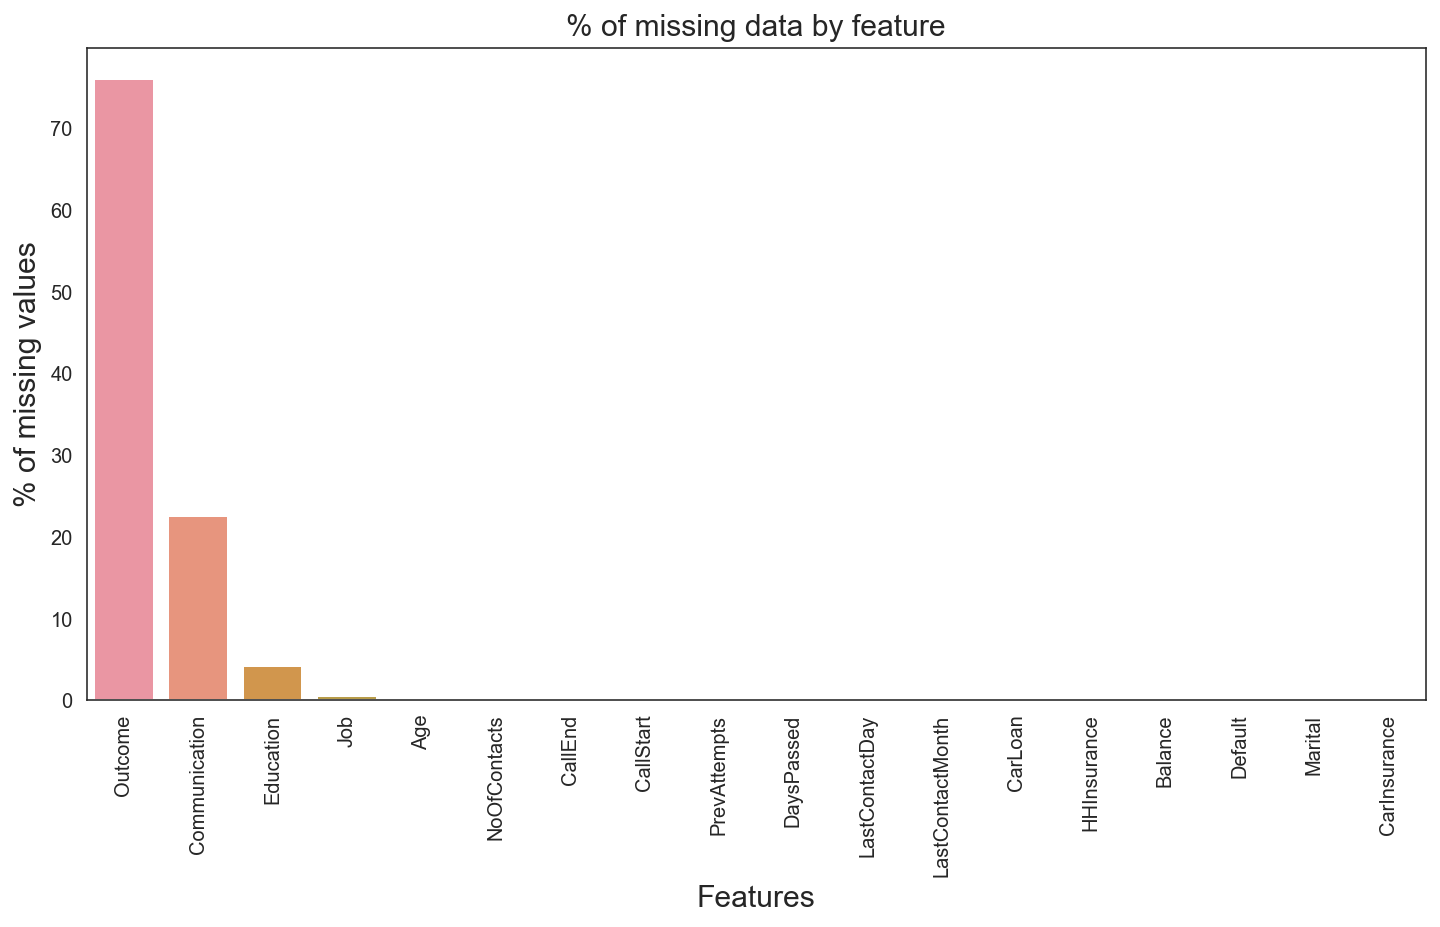

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x=missing_df.index, y=missing_df['Percent Missing'])
plt.title('% of missing data by feature', size=15)
plt.xlabel('Features', size=15)
plt.ylabel('% of missing values', size=15)
plt.xticks(rotation=90);

Let's examine the missing values in the data

##### Missing values in 'Job'

In [23]:
job_missing = df[df['Job'].isna()]
job_missing.head()

Age  Job   Marital  Education  Default  Balance  HHInsurance  CarLoan  \
27    45  NaN  divorced        NaN        0        0            0        0   
239   41  NaN    single        NaN        0      942            0        0   
486   54  NaN   married    primary        0      981            0        0   
536   33  NaN    single  secondary        0     1522            0        1   
605   53  NaN   married    primary        0      732            0        0   

    Communication  LastContactDay LastContactMonth  NoOfContacts  DaysPassed  \
27       cellular              21              apr             3          -1   
239      cellular              27              oct             1         188   
486      cellular              22              aug            12          -1   
536      cellular              19              nov             1          -1   
605      cellular              27              oct             2          -1   

     PrevAttempts  Outcome CallStart   CallEnd  CarInsurance  
27              0      NaN  12:33:22  12:38:00             1  
239             1  success  16:39:43  16:42:06             1  
486             0      NaN  11:31:36  11:42:27             0  
536             0      NaN  12:44:40  13:00:46             0  
605             0      NaN  09:01:01  09:13:40             1

##### Missing values in 'Education'

In [24]:
education_missing = df[df['Education'].isna()]
education_missing.head()

Age         Job   Marital Education  Default  Balance  HHInsurance  \
14   25    services    single       NaN        0     2022            0   
27   45         NaN  divorced       NaN        0        0            0   
50   54    services  divorced       NaN        0        0            1   
53   78     retired   married       NaN        0     3208            0   
58   34  management    single       NaN        0     6013            1   

    CarLoan Communication  LastContactDay LastContactMonth  NoOfContacts  \
14        0      cellular              29              jul             8   
27        0      cellular              21              apr             3   
50        0      cellular              16              apr             1   
53        0     telephone              20              may             3   
58        0      cellular              18              may             1   

    DaysPassed  PrevAttempts Outcome CallStart   CallEnd  CarInsurance  
14          97            12   other  14:15:09  14:19:45             1  
27          -1             0     NaN  12:33:22  12:38:00             1  
50          -1             0     NaN  16:18:17  16:22:40             0  
53          -1             0     NaN  16:00:27  16:06:18             1  
58          -1             0     NaN  13:52:00  14:02:12             1

##### Missing values in 'Communication'

In [25]:
communication_missing = df[df['Communication'].isna()]
communication_missing.head()

Age            Job   Marital  Education  Default  Balance  HHInsurance  \
1    32    blue-collar   married    primary        0     1156            1   
7    35     management  divorced   tertiary        0      538            1   
13   38  self-employed  divorced  secondary        0     2674            1   
20   57    blue-collar   married  secondary        0      773            1   
28   34       services   married  secondary        0      -62            1   

    CarLoan Communication  LastContactDay LastContactMonth  NoOfContacts  \
1         0           NaN              26              may             5   
7         0           NaN              12              may             4   
13        0           NaN              19              jun             2   
20        1           NaN              18              jun             8   
28        0           NaN              16              jun             3   

    DaysPassed  PrevAttempts Outcome CallStart   CallEnd  CarInsurance  
1           -1             0     NaN  14:49:03  14:52:08             0  
7           -1             0     NaN  15:39:43  15:40:49             0  
13          -1             0     NaN  10:29:56  10:32:39             0  
20          -1             0     NaN  09:05:50  09:07:27             0  
28          -1             0     NaN  13:50:40  13:52:29             0

##### Missing values in 'Outcome'

In [26]:
outcome_missing = df[df['Outcome'].isna()]
outcome_missing.head()

Age          Job  Marital Education  Default  Balance  HHInsurance  \
0   32   management   single  tertiary        0     1218            1   
1   32  blue-collar  married   primary        0     1156            1   
3   25      student   single   primary        0      373            1   
4   30   management  married  tertiary        0     2694            0   
6   37       admin.   single  tertiary        0     1000            1   

   CarLoan Communication  LastContactDay LastContactMonth  NoOfContacts  \
0        0     telephone              28              jan             2   
1        0           NaN              26              may             5   
3        0      cellular              11              may             2   
4        0      cellular               3              jun             1   
6        0      cellular              17              mar             1   

   DaysPassed  PrevAttempts Outcome CallStart   CallEnd  CarInsurance  
0          -1             0     NaN  13:45:20  13:46:30             0  
1          -1             0     NaN  14:49:03  14:52:08             0  
3          -1             0     NaN  12:06:43  12:20:22             1  
4          -1             0     NaN  14:35:44  14:38:56             0  
6          -1             0     NaN  13:00:02  13:03:17             1

    When examining the missing values, we can conclude:

    - 'Job' and 'Education': 
    The missing values are most likely because the customer didn't specify this information.

    - 'Communication': 
    The missing values are most likely becuase the organization forgot to specify this information.

    - 'Outcome': 
    The missing values are because some customers haven't been offered anything before, so there is no outcome.

### 2.6 Statistical Description of Features

In [27]:
df.describe().T

count        mean          std     min    25%    50%     75%  \
Age             4000.0    41.21475    11.550194    18.0   32.0   39.0    49.0   
Default         4000.0     0.01450     0.119555     0.0    0.0    0.0     0.0   
Balance         4000.0  1532.93725  3511.452489 -3058.0  111.0  551.5  1619.0   
HHInsurance     4000.0     0.49275     0.500010     0.0    0.0    0.0     1.0   
CarLoan         4000.0     0.13300     0.339617     0.0    0.0    0.0     0.0   
LastContactDay  4000.0    15.72125     8.425307     1.0    8.0   16.0    22.0   
NoOfContacts    4000.0     2.60725     3.064204     1.0    1.0    2.0     3.0   
DaysPassed      4000.0    48.70650   106.685385    -1.0   -1.0   -1.0    -1.0   
PrevAttempts    4000.0     0.71750     2.078647     0.0    0.0    0.0     0.0   
CarInsurance    4000.0     0.40100     0.490162     0.0    0.0    0.0     1.0   

                    max  
Age                95.0  
Default             1.0  
Balance         98417.0  
HHInsurance         1.0  
CarLoan             1.0  
LastContactDay     31.0  
NoOfContacts       43.0  
DaysPassed        854.0  
PrevAttempts       58.0  
CarInsurance        1.0

In [28]:
df.describe(include='object').T

count unique         top  freq
Job               3981     11  management   893
Marital           4000      3     married  2304
Education         3831      3   secondary  1988
Communication     3098      2    cellular  2831
LastContactMonth  4000     12         may  1049
Outcome            958      3     failure   437
CallStart         4000   3777    17:11:04     3
CallEnd           4000   3764    10:22:30     3

In [29]:
obj_cols = ['Default', 'HHInsurance', 'CarLoan', 'LastContactDay']

for feature in obj_cols:
    df[feature] = df[feature].astype('object')

In [30]:
df.describe().T

count        mean          std     min    25%    50%     75%  \
Age           4000.0    41.21475    11.550194    18.0   32.0   39.0    49.0   
Balance       4000.0  1532.93725  3511.452489 -3058.0  111.0  551.5  1619.0   
NoOfContacts  4000.0     2.60725     3.064204     1.0    1.0    2.0     3.0   
DaysPassed    4000.0    48.70650   106.685385    -1.0   -1.0   -1.0    -1.0   
PrevAttempts  4000.0     0.71750     2.078647     0.0    0.0    0.0     0.0   
CarInsurance  4000.0     0.40100     0.490162     0.0    0.0    0.0     1.0   

                  max  
Age              95.0  
Balance       98417.0  
NoOfContacts     43.0  
DaysPassed      854.0  
PrevAttempts     58.0  
CarInsurance      1.0

In [31]:
df.describe(include='object').T

count unique         top  freq
Job               3981     11  management   893
Marital           4000      3     married  2304
Education         3831      3   secondary  1988
Default           4000      2           0  3942
HHInsurance       4000      2           0  2029
CarLoan           4000      2           0  3468
Communication     3098      2    cellular  2831
LastContactDay    4000     31          18   203
LastContactMonth  4000     12         may  1049
Outcome            958      3     failure   437
CallStart         4000   3777    17:11:04     3
CallEnd           4000   3764    10:22:30     3

# Target Feature

In [32]:
target = pd.DataFrame(df['CarInsurance'])

##### 1. Statistical Summary of Target Feature

In [33]:
target.describe()

CarInsurance
count   4000.000000
mean       0.401000
std        0.490162
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000

##### 2. Frequency of Target Feature

In [34]:
target_count = target.value_counts()
target_percent = target.value_counts(normalize=True) * 100

In [35]:
non_sub_count = target_count[0]
sub_count = target_count[1]
print(f'The # of non-subscribers to insurance: {non_sub_count}')
print(f'The # of subscribers to insurance: {sub_count}')

The # of non-subscribers to insurance: 2396
The # of subscribers to insurance: 1604


In [36]:
non_sub_percent = target_percent[0]
sub_percent = target_percent[1]
print(f'The percentage of non-subscribers to insurance: {non_sub_percent}%')
print(f'The percentage of subscribers to insurance: {sub_percent}%')

The percentage of non-subscribers to insurance: 59.9%
The percentage of subscribers to insurance: 40.1%


In [37]:
target['CarInsurance'].iplot(kind='hist', title='<b>Target Feature Count Distribution<b>');

In [38]:
labels = df['CarInsurance'].unique()
values = df['CarInsurance'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.2)])
fig.update_layout(title_text='<b>Target Feature % Distribution<b>')
fig.show()

# Numerical Features

In [39]:
# Select numerical features
numerical = df.select_dtypes(include='number').columns

In [40]:
# Examine numerical features
df[numerical].head()

Age  Balance  NoOfContacts  DaysPassed  PrevAttempts  CarInsurance
0   32     1218             2          -1             0             0
1   32     1156             5          -1             0             0
2   29      637             1         119             1             1
3   25      373             2          -1             0             1
4   30     2694             1          -1             0             0

In [41]:
print(f'The # of numerical features are: {len(numerical)}')

The # of numerical features are: 6


## Univariate Analysis of Numerical Features

##### 1. Statistical Summary of Numerical Features

In [42]:
df[numerical].describe().T.style.background_gradient(subset=['count', 'mean','std','50%'], cmap='RdPu').format('{:.2f}')

 - There are 6 numerical features in the data.
 - Numerical features have no missing values.
 - Numerical features have varying scales of magnitude.
 - 'Age', 'Balance', 'NoOfContacts', 'DaysPassed', and 'PrevAttempts'  features have right skew, the mean is larger than the median.

##### 2. Skew & Kurt of Numerical Features

In [43]:
skew = df[numerical].skew()
skew = pd.DataFrame(skew, columns=['Skewness'])
skew.sort_values(by='Skewness', ascending=False, inplace=True)
skew

Skewness
Balance       9.877895
PrevAttempts  8.932735
NoOfContacts  5.241314
DaysPassed    2.536872
Age           0.763293
CarInsurance  0.404150

In [44]:
skew_limit = 0.75
skew_vals = df[numerical].skew()
skew_feats = skew_vals[abs(skew_vals) > skew_limit]
skew_feats = pd.DataFrame(skew_feats, columns=['Skewness'])
skew_feats.sort_values(by='Skewness', ascending=False, inplace=True)
skew_feats

Skewness
Balance       9.877895
PrevAttempts  8.932735
NoOfContacts  5.241314
DaysPassed    2.536872
Age           0.763293

In [45]:
kurt = df[numerical].kurt()
kurt = pd.DataFrame(kurt, columns=['Kurtosis'])
kurt.sort_values(by='Kurtosis', ascending=False, inplace=True)
kurt

Kurtosis
Balance       185.055975
PrevAttempts  170.039968
NoOfContacts   40.191337
DaysPassed      7.537368
Age             0.492527
CarInsurance   -1.837582

In [46]:
kurt_limit = 1
kurt_vals = df[numerical].kurt()
kurt_feats = kurt_vals[abs(kurt_vals) > kurt_limit]
kurt_feats = pd.DataFrame(kurt_feats, columns=['Kurtosis'])
kurt_feats.sort_values(by='Kurtosis', ascending=False, inplace=True)
kurt_feats

Kurtosis
Balance       185.055975
PrevAttempts  170.039968
NoOfContacts   40.191337
DaysPassed      7.537368
CarInsurance   -1.837582

##### 3. Distribution of Numerical Features

###### Pairplot: Histogram + Scatterplot

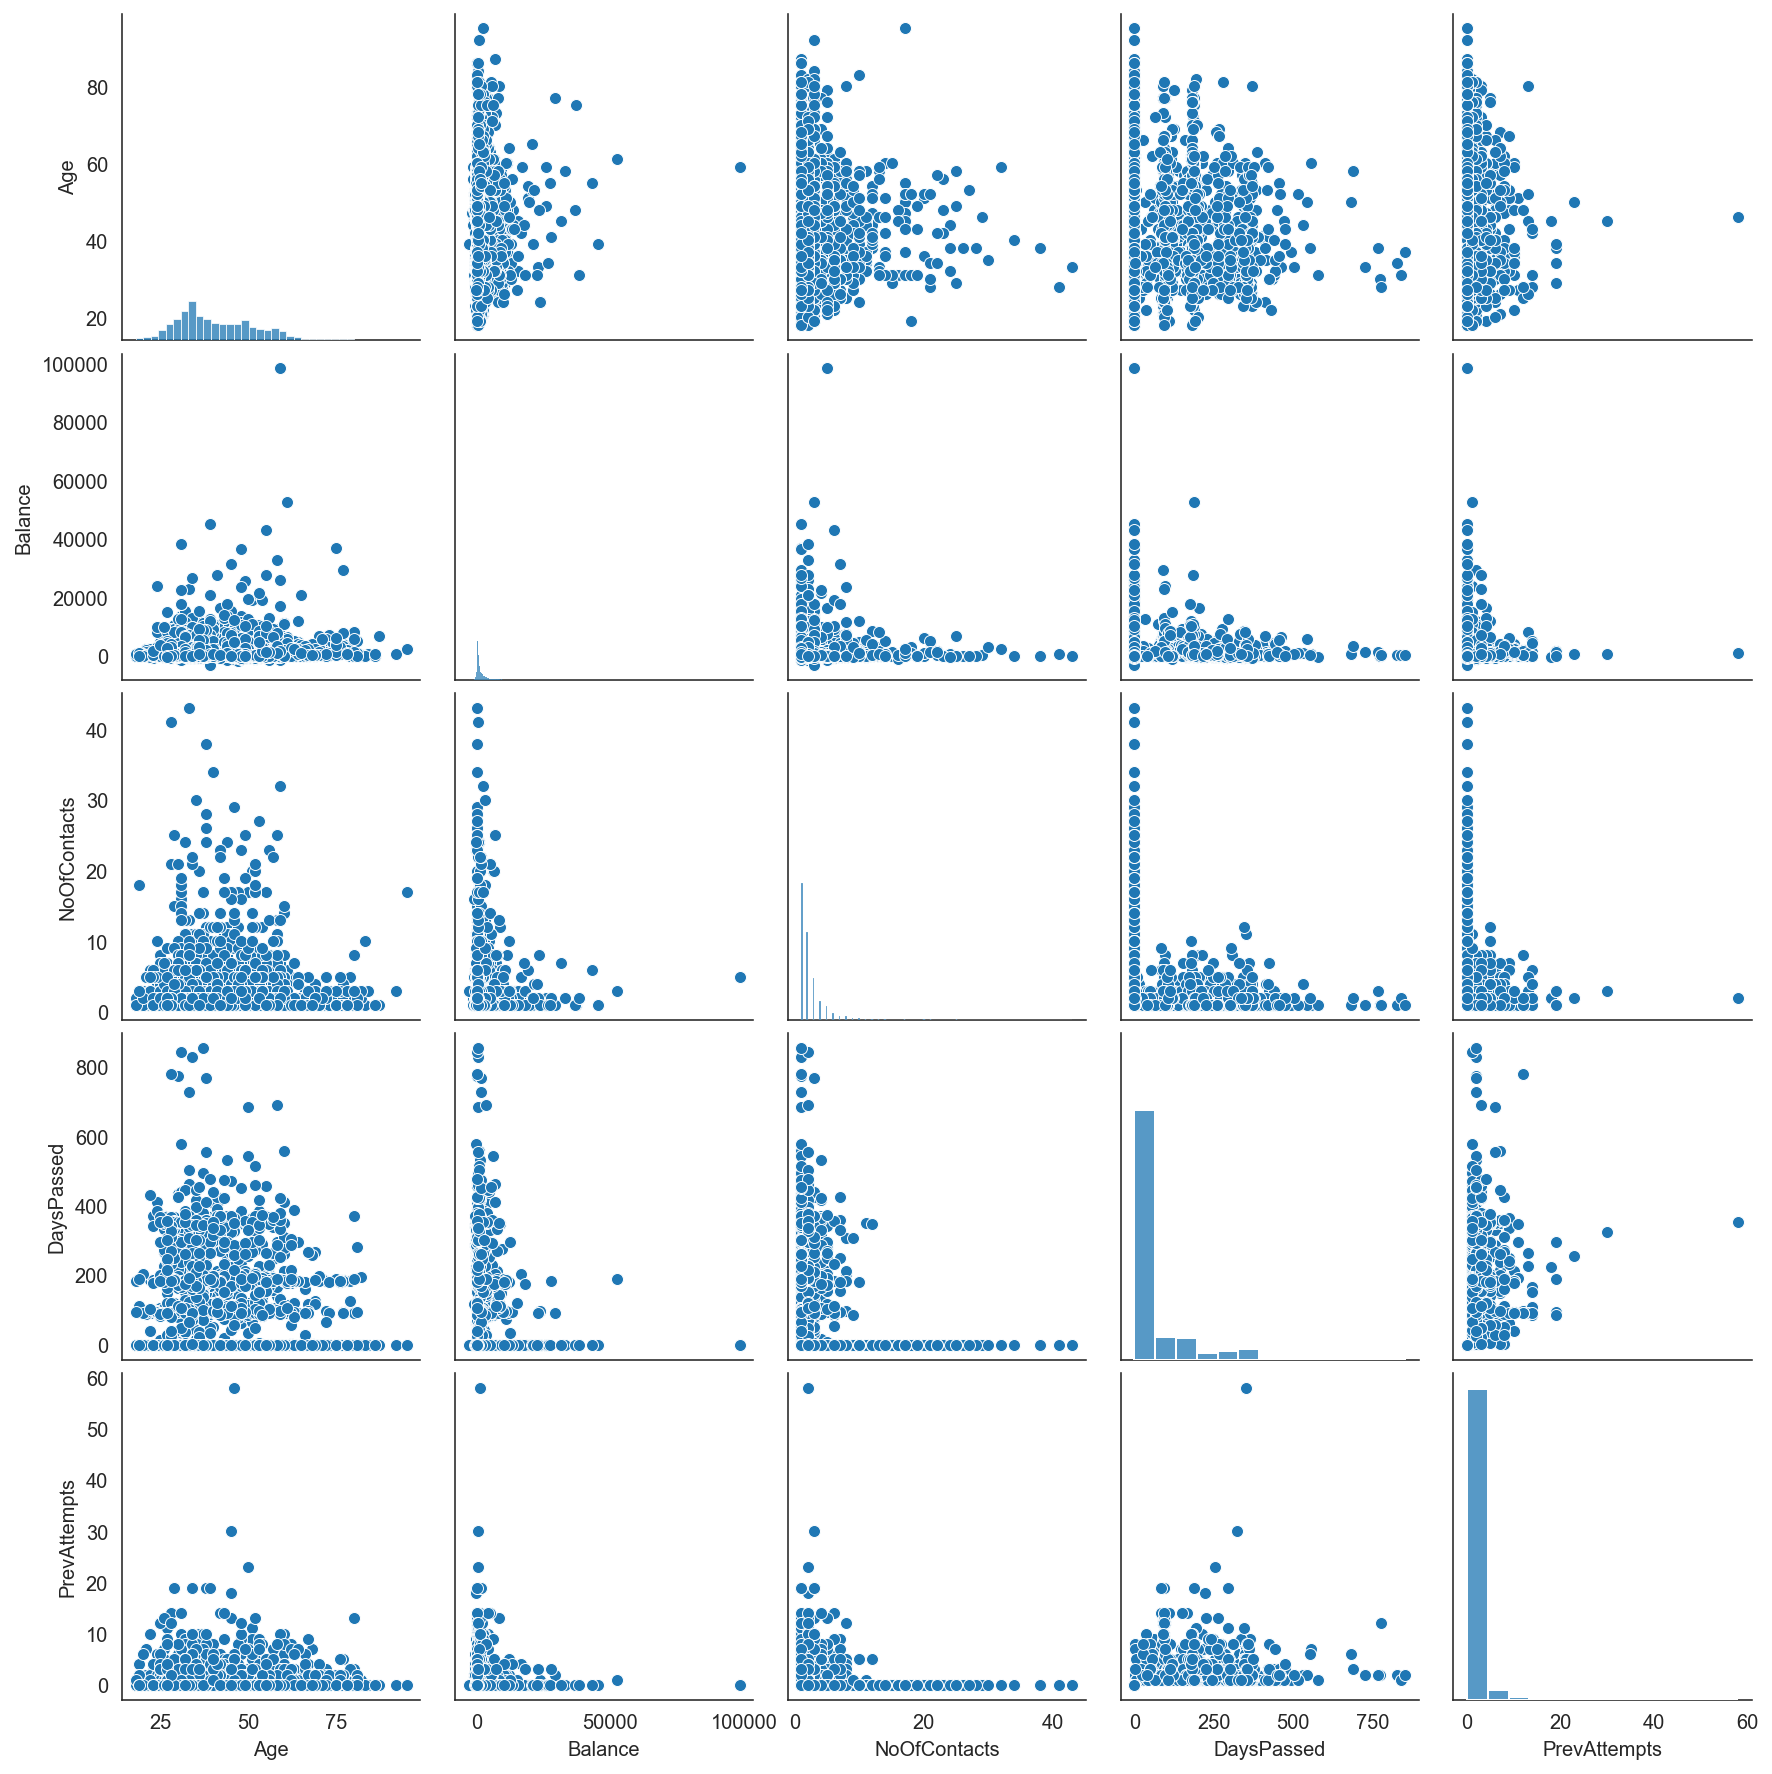

In [47]:
sns.pairplot(data=df[numerical].drop('CarInsurance', axis=1));

##### Histograms

In [48]:
df[numerical].drop('CarInsurance', axis=1).iplot(kind='hist', subplots=True, bins=50);

##### Boxplots

In [49]:
df[numerical].drop('CarInsurance', axis=1).iplot(kind='box', boxpoints='all', subplots=True);

In [50]:
for feature in df[numerical].drop('CarInsurance', axis=1):
    df[feature].iplot(kind='box', title=f'Distribution of {feature}', boxpoints='all')    
    

## Bivariate Analysis of Numerical Features (vs. Target Feature)

##### 1. GroupBy

In [51]:
df.groupby(by='CarInsurance')[numerical].describe().T

CarInsurance                   0             1
Age          count   2396.000000   1604.000000
             mean      40.844741     41.767456
             std       10.253331     13.237319
             min       19.000000     18.000000
             25%       33.000000     32.000000
             50%       39.000000     39.000000
             75%       48.000000     50.000000
             max       83.000000     95.000000
Balance      count   2396.000000   1604.000000
             mean    1413.544658   1711.281796
             std     3644.867764   3295.204444
             min    -1730.000000  -3058.000000
             25%       65.000000    207.750000
             50%      457.000000    700.000000
             75%     1347.500000   2010.750000
             max    98417.000000  52587.000000
NoOfContacts count   2396.000000   1604.000000
             mean       2.895242      2.177057
             std        3.562312      2.038267
             min        1.000000      1.000000
             25%        1.000000      1.000000
             50%        2.000000      2.000000
             75%        3.000000      3.000000
             max       43.000000     29.000000
DaysPassed   count   2396.000000   1604.000000
             mean      36.579716     66.821072
             std       94.850661    120.017793
             min       -1.000000     -1.000000
             25%       -1.000000     -1.000000
             50%       -1.000000     -1.000000
             75%       -1.000000     95.000000
             max      779.000000    854.000000
PrevAttempts count   2396.000000   1604.000000
             mean       0.464524      1.095387
             std        1.544603      2.641197
             min        0.000000      0.000000
             25%        0.000000      0.000000
             50%        0.000000      0.000000
             75%        0.000000      1.000000
             max       23.000000     58.000000
CarInsurance count   2396.000000   1604.000000
             mean       0.000000      1.000000
             std        0.000000      0.000000
             min        0.000000      1.000000
             25%        0.000000      1.000000
             50%        0.000000      1.000000
             75%        0.000000      1.000000
             max        0.000000      1.000000

##### 2. Distributions

###### Pairplot: KDE + Scatterplot

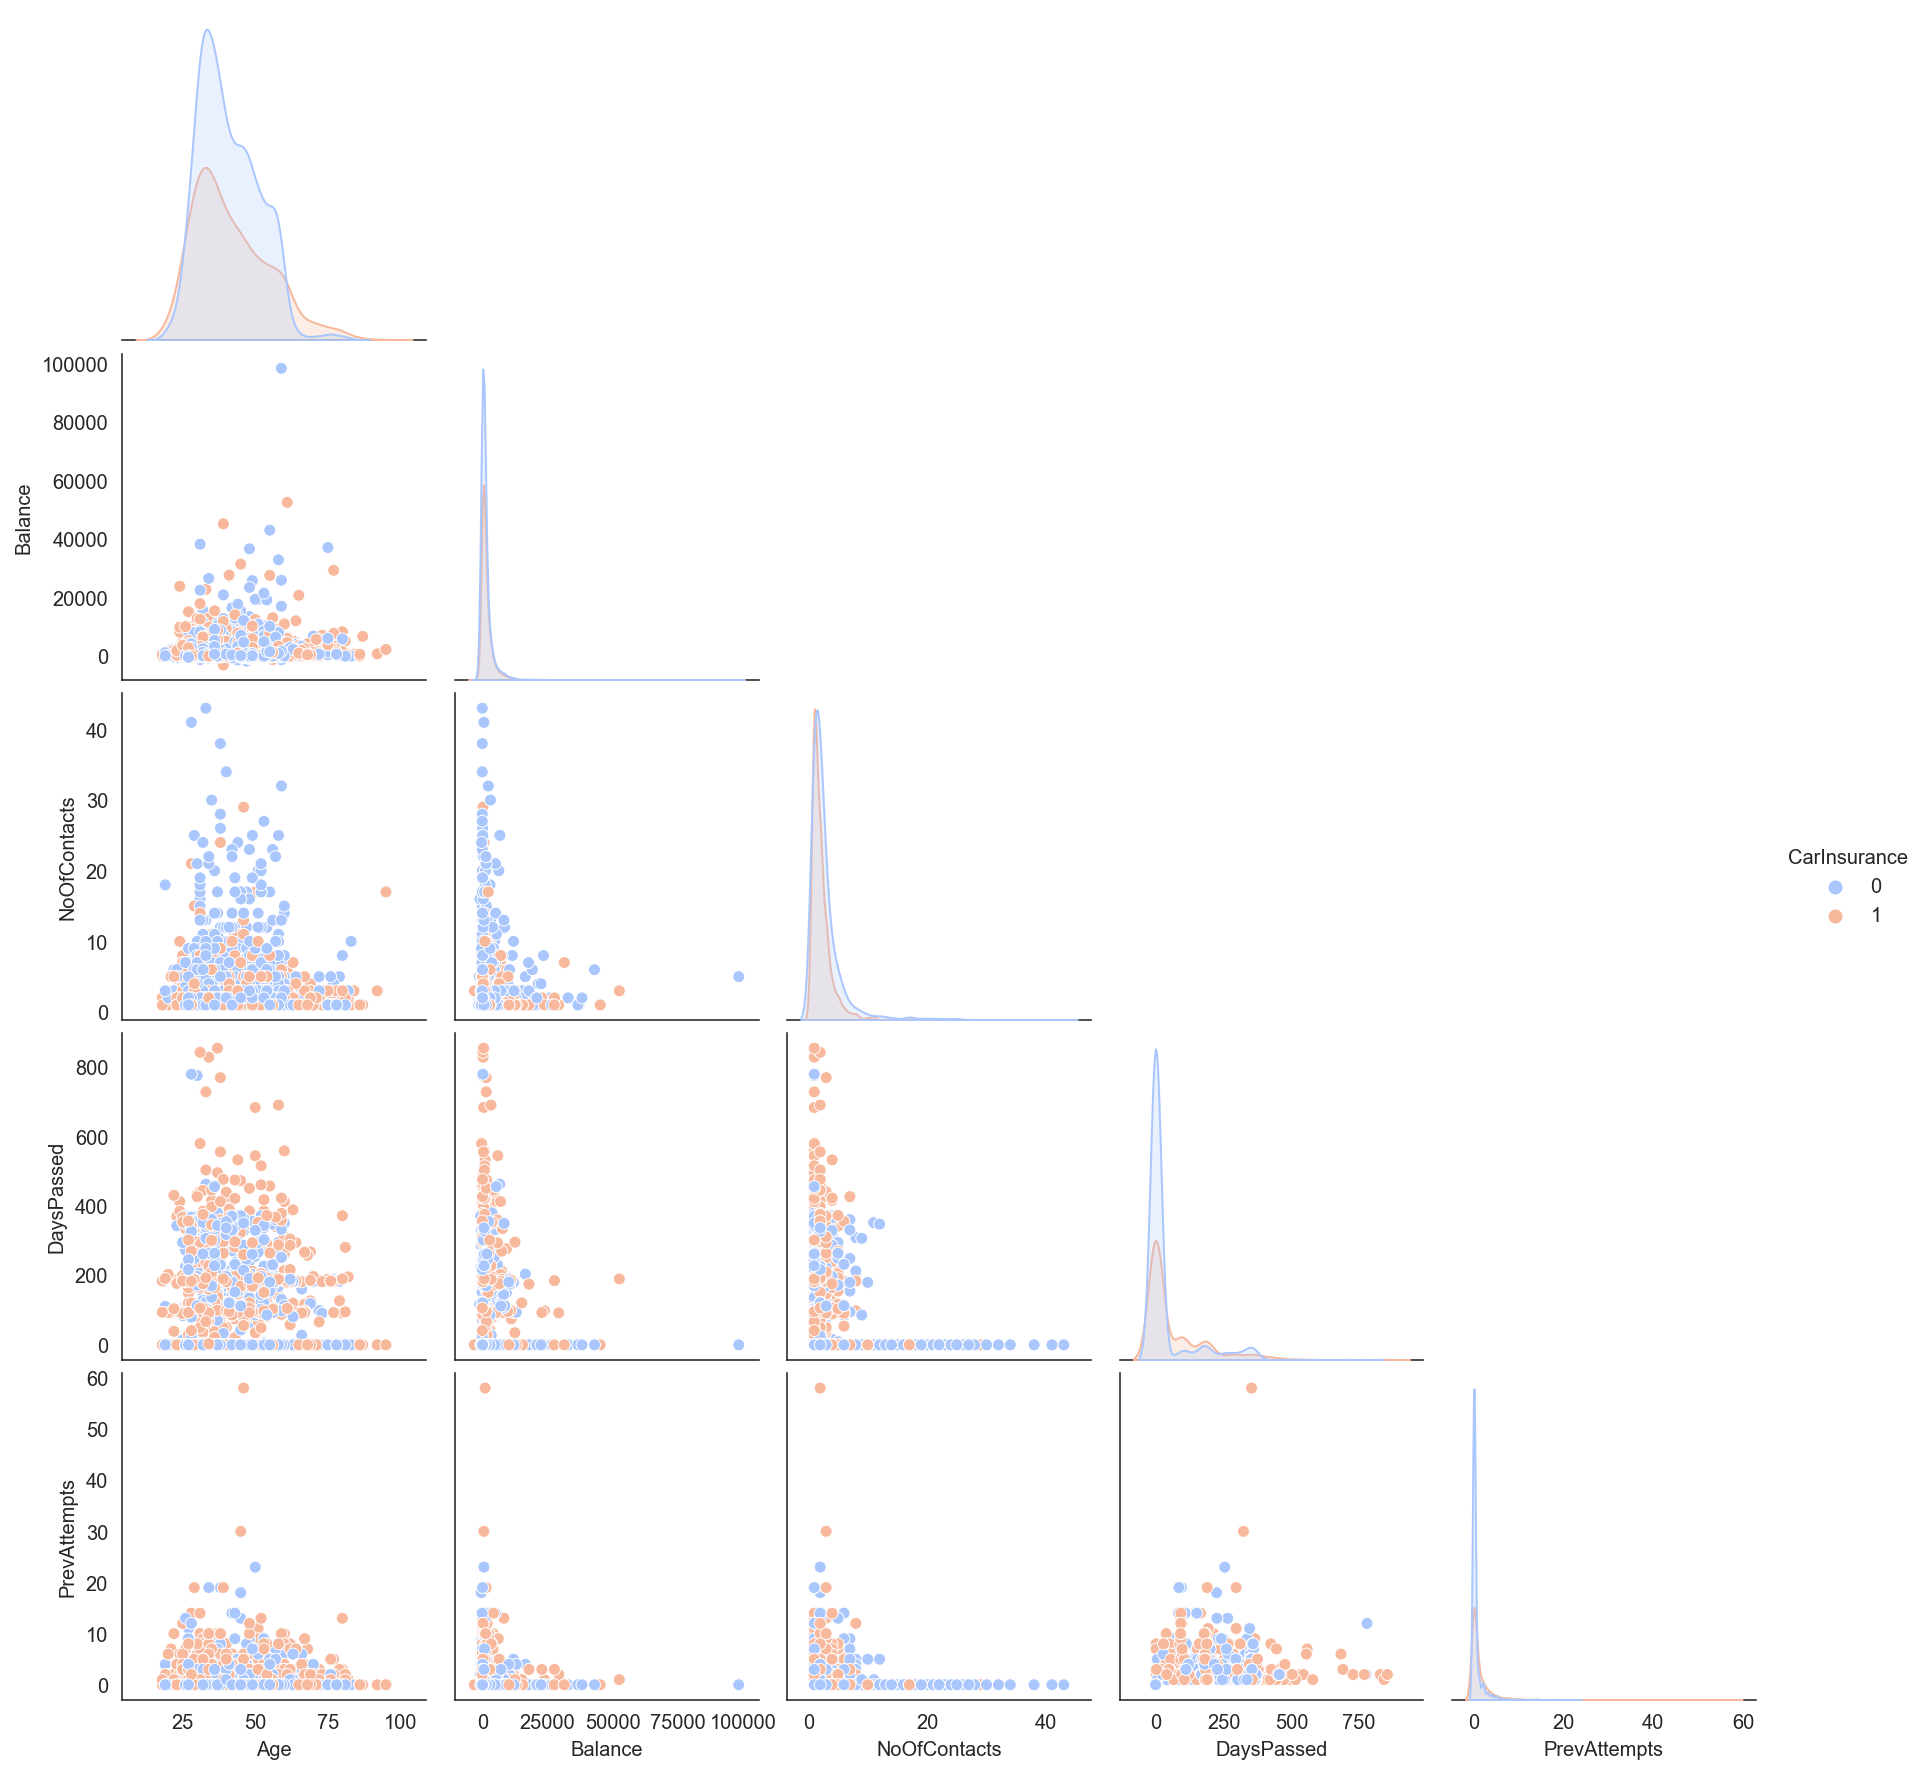

In [52]:
sns.pairplot(data=df[numerical], hue='CarInsurance', palette='coolwarm', corner=True);

##### Boxplots

In [53]:
for feature in df[numerical]:
    fig = px.box(df, x='CarInsurance', y=feature)
    fig.show();

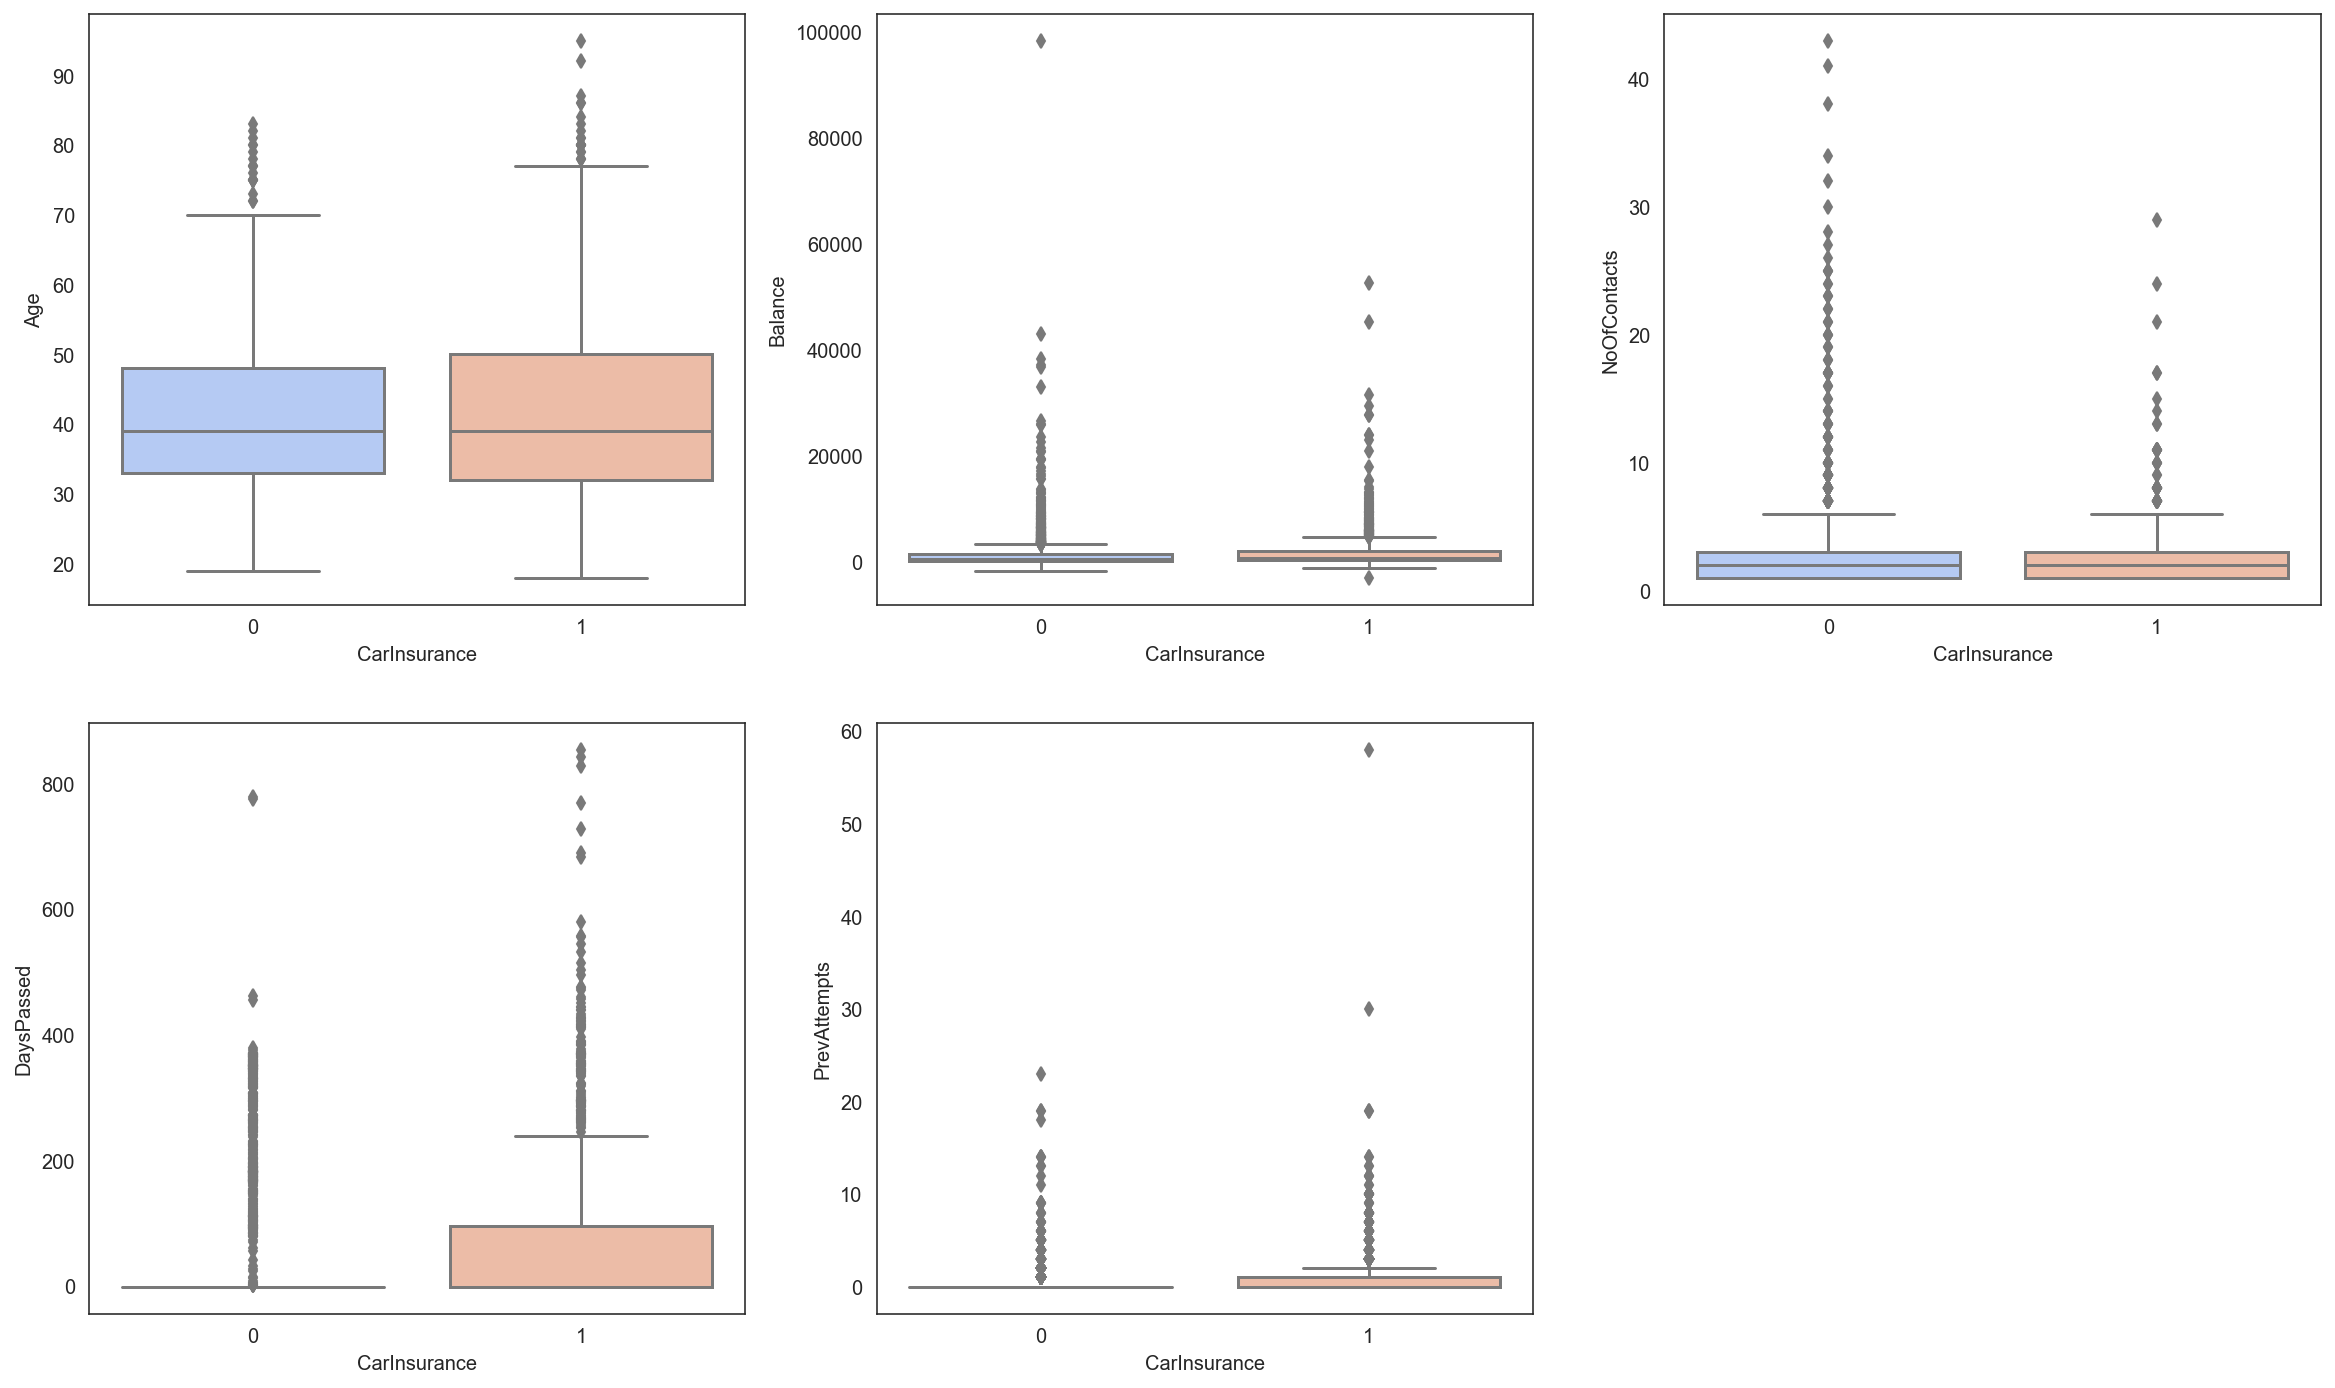

In [54]:
index = 0
plt.figure(figsize=(20, 25))
for feature in numerical:
    if feature != 'CarInsurance':
        index += 1
        plt.subplot(4, 3, index)
        sns.boxplot(data=df, x='CarInsurance', y=feature, palette='coolwarm')

## Numerical Features Relationship

##### 1. Correlation Matrix + Heatmap

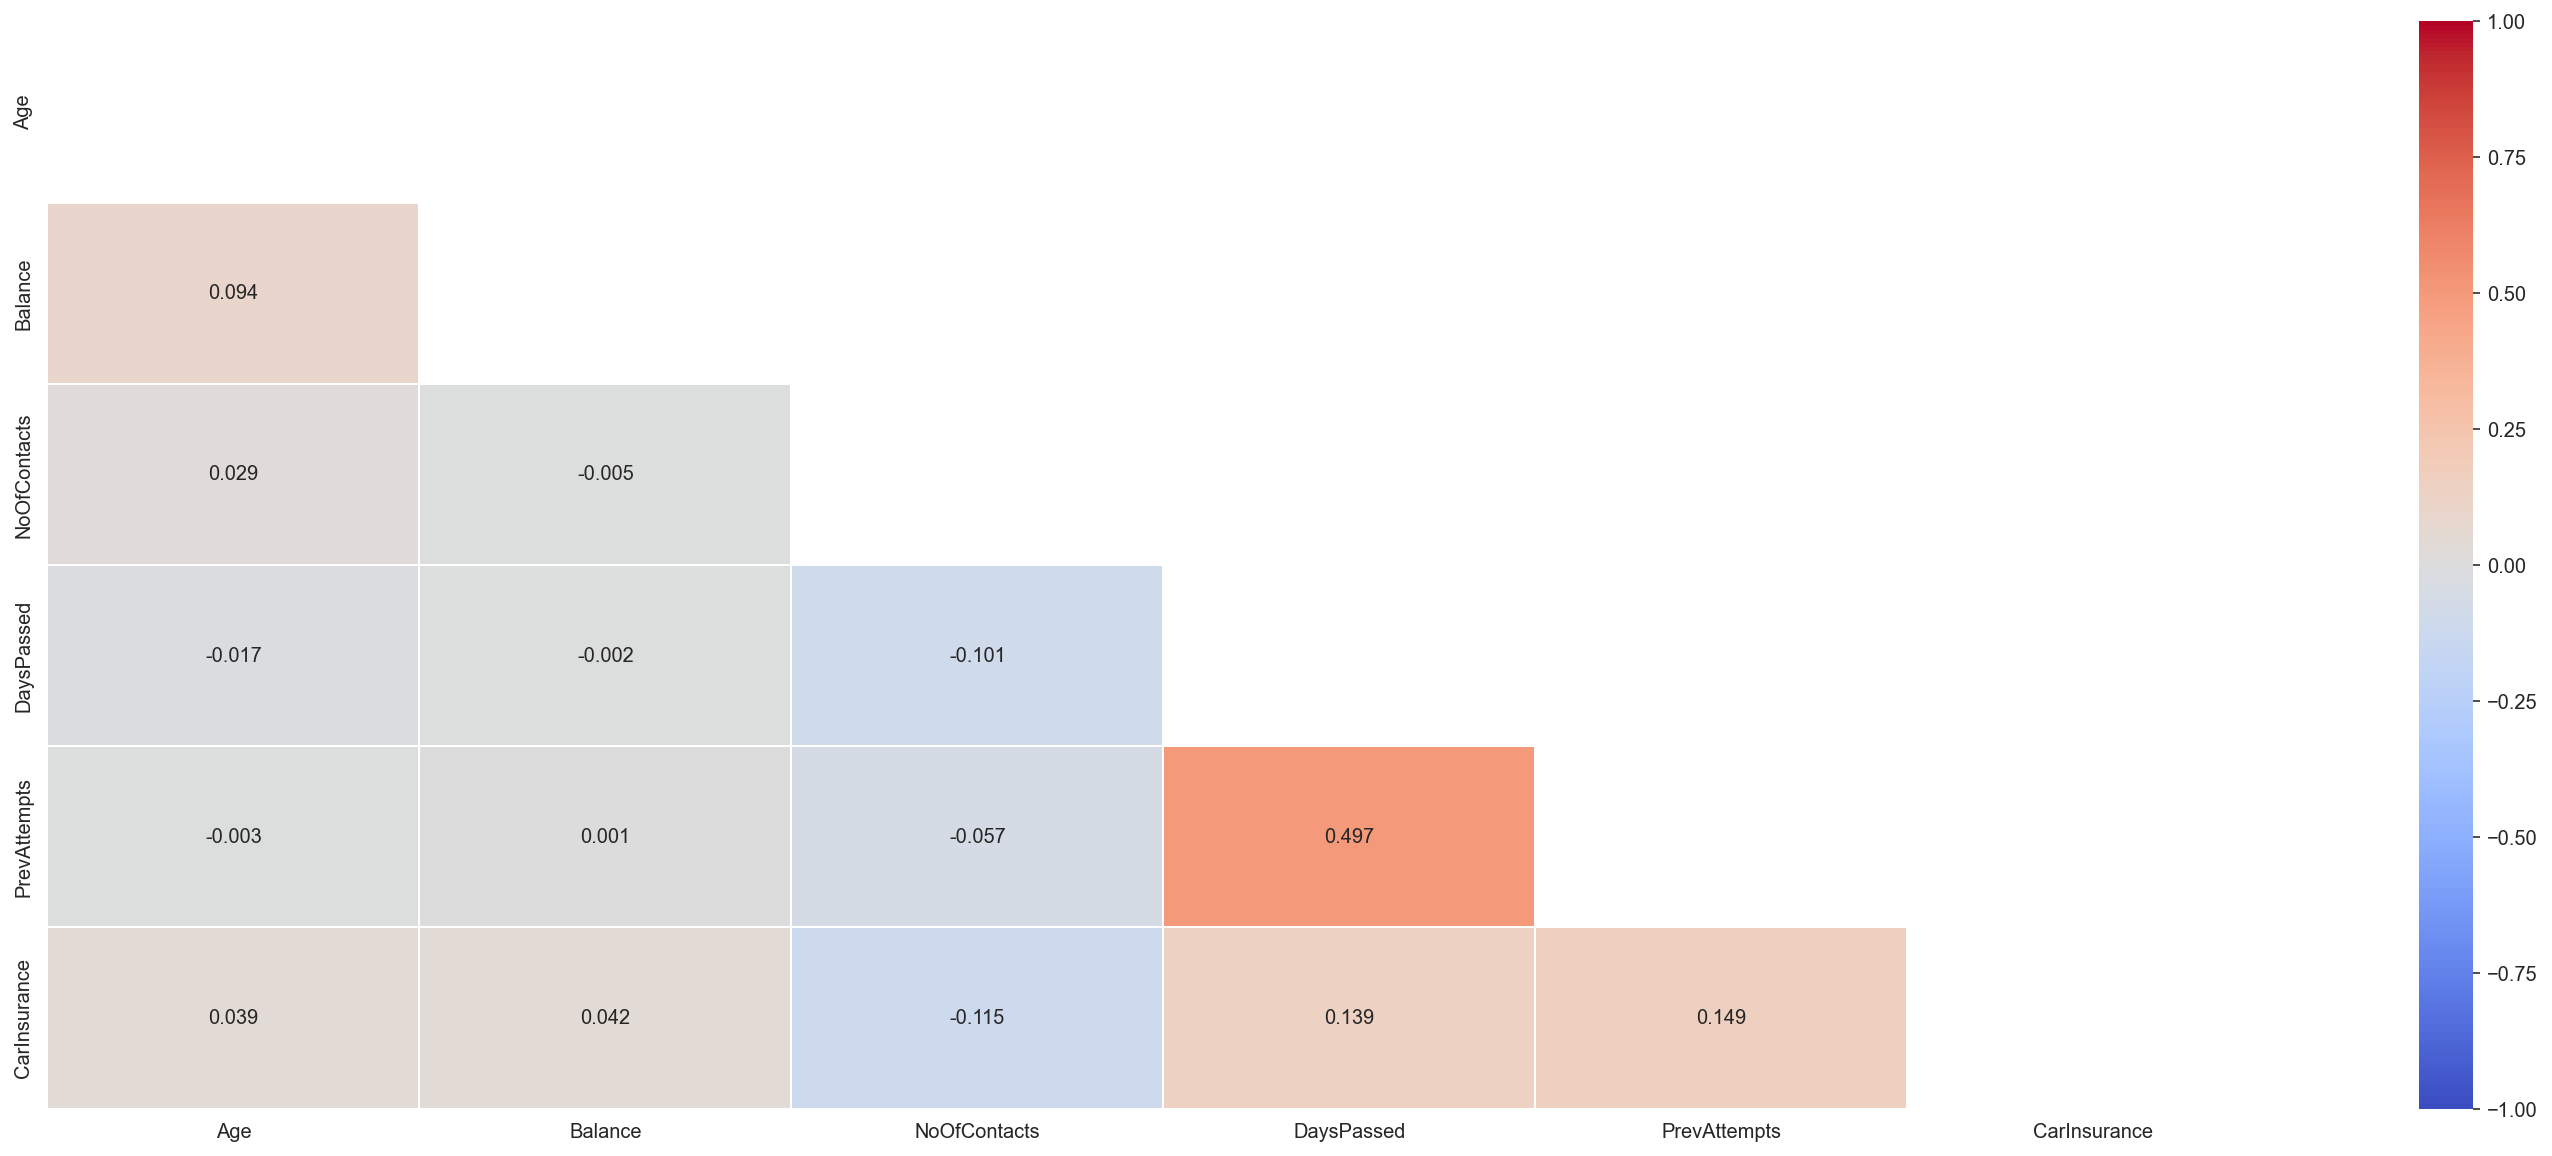

In [55]:
plt.figure(figsize=(25, 10))

corr_matrix = df[numerical].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

ax = sns.heatmap(corr_matrix, 
                 mask=mask, 
                 xticklabels=corr_matrix.columns, 
                 yticklabels=corr_matrix.columns, 
                 annot=True,
                 fmt='.3f',
                 linewidths=.2, 
                 cmap='coolwarm', 
                 vmin=-1, vmax=1);

# Categorical Features

In [56]:
# Select categorical features
categorical = df.select_dtypes(include='object').columns

In [57]:
# Examine catergorical features
df[categorical].head()

Job  Marital Education Default HHInsurance CarLoan Communication  \
0   management   single  tertiary       0           1       0     telephone   
1  blue-collar  married   primary       0           1       0           NaN   
2   management   single  tertiary       0           1       0      cellular   
3      student   single   primary       0           1       0      cellular   
4   management  married  tertiary       0           0       0      cellular   

  LastContactDay LastContactMonth  Outcome CallStart   CallEnd  
0             28              jan      NaN  13:45:20  13:46:30  
1             26              may      NaN  14:49:03  14:52:08  
2              3              jun  failure  16:30:24  16:36:04  
3             11              may      NaN  12:06:43  12:20:22  
4              3              jun      NaN  14:35:44  14:38:56

In [58]:
print(f'The # of categorical features are: {len(categorical)}')

The # of categorical features are: 12


## Univariate Analysis of Categorical Features

##### 1. Statistical Summary of Categorical Features

In [59]:
df[categorical].describe().T.style.background_gradient(subset=['unique','freq','count'], cmap='coolwarm')

##### 2. Unique Values of Categorical Features

In [60]:
for feature in categorical:
    print(f'Feature: {feature}')
    print(f'# of Unique Values: {df[feature].nunique()}')
    print(f'Unique Values: {df[feature].unique()}\n')
    print('-' * 50)
    print()

Feature: Job
# of Unique Values: 11
Unique Values: ['management' 'blue-collar' 'student' 'technician' 'admin.' 'services'
 'self-employed' 'retired' nan 'housemaid' 'entrepreneur' 'unemployed']

--------------------------------------------------

Feature: Marital
# of Unique Values: 3
Unique Values: ['single' 'married' 'divorced']

--------------------------------------------------

Feature: Education
# of Unique Values: 3
Unique Values: ['tertiary' 'primary' 'secondary' nan]

--------------------------------------------------

Feature: Default
# of Unique Values: 2
Unique Values: [0 1]

--------------------------------------------------

Feature: HHInsurance
# of Unique Values: 2
Unique Values: [1 0]

--------------------------------------------------

Feature: CarLoan
# of Unique Values: 2
Unique Values: [0 1]

--------------------------------------------------

Feature: Communication
# of Unique Values: 2
Unique Values: ['telephone' nan 'cellular']

---------------------------------

##### 3. Distributions

###### Frequency Table

In [61]:
for feature in categorical:
    print(f'Feature: {feature}\n')
    print(f'Count Distribution of {feature}:\n')
    print(f'{df[feature].value_counts()}\n')
    print(f'Percentage Distribution of {feature}:\n')
    print(f'{df[feature].value_counts(normalize=True) * 100}\n')
    print('-' * 50)
    print()

Feature: Job

Count Distribution of Job:

management       893
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
Name: Job, dtype: int64

Percentage Distribution of Job:

management       22.431550
blue-collar      19.065561
technician       16.578749
admin.           11.529766
services          8.289375
retired           6.254710
self-employed     3.516704
student           3.290630
unemployed        3.265511
entrepreneur      3.039437
housemaid         2.738006
Name: Job, dtype: float64

--------------------------------------------------

Feature: Marital

Count Distribution of Marital:

married     2304
single      1213
divorced     483
Name: Marital, dtype: int64

Percentage Distribution of Marital:

married     57.600
single      30.325
divorced    12.075
Name: Marital, dtype: float64

--------------------------------------

##### Histogram

## Bivariate Analysis of Categorical Features

##### 1. GroupBy

In [62]:
df.groupby('CarInsurance')[categorical].describe().T

CarInsurance                       0           1
Job              count          2386        1595
                 unique           11          11
                 top     blue-collar  management
                 freq            540         392
Marital          count          2396        1604
                 unique            3           3
                 top         married     married
                 freq           1471         833
Education        count          2306        1525
                 unique            3           3
                 top       secondary   secondary
                 freq           1258         730
Default          count          2396        1604
                 unique            2           2
                 top               0           0
                 freq           2352        1590
HHInsurance      count          2396        1604
                 unique            2           2
                 top               1           0
                 freq           1380        1013
CarLoan          count          2396        1604
                 unique            2           2
                 top               0           0
                 freq           2016        1452
Communication    count          1662        1436
                 unique            2           2
                 top        cellular    cellular
                 freq           1518        1313
LastContactDay   count          2396        1604
                 unique           31          31
                 top              18          12
                 freq            136          86
LastContactMonth count          2396        1604
                 unique           12          12
                 top             may         may
                 freq            760         289
Outcome          count           399         559
                 unique            3           3
                 top         failure     success
                 freq            261         291
CallStart        count          2396        1604
                 unique         2320        1568
                 top        11:48:25    13:54:34
                 freq              3           3
CallEnd          count          2396        1604
                 unique         2313        1566
                 top        11:27:46    09:17:09
                 freq              3           2

##### 2. Crosstab

In [63]:
for value, feature in enumerate(df[categorical]):
    xtab = pd.crosstab(df[feature], df['CarInsurance'], normalize=True, margins=True)
    print('-' * 50, sep='')
    print(xtab)

--------------------------------------------------
CarInsurance          0         1       All
Job                                        
admin.         0.068827  0.046471  0.115298
blue-collar    0.135644  0.055011  0.190656
entrepreneur   0.021603  0.008792  0.030394
housemaid      0.018086  0.009294  0.027380
management     0.125848  0.098468  0.224315
retired        0.025873  0.036674  0.062547
self-employed  0.021603  0.013564  0.035167
services       0.054760  0.028134  0.082894
student        0.011052  0.021854  0.032906
technician     0.101984  0.063803  0.165787
unemployed     0.014067  0.018588  0.032655
All            0.599347  0.400653  1.000000
--------------------------------------------------
CarInsurance        0        1      All
Marital                                
divorced      0.06825  0.05250  0.12075
married       0.36775  0.20825  0.57600
single        0.16300  0.14025  0.30325
All           0.59900  0.40100  1.00000
------------------------------------------

##### 3. Distributions

###### Histogram

In [64]:
for value, feature in enumerate(df[categorical]):
    fig = px.histogram(df[feature], color=df['CarInsurance'], barmode='group', title=feature)
    fig.show()

## Categorical Features Relationship

##### 1. Mutual Info Score

# 3-4. Data Preparation + Modeling

### Metric Selection

As we saw during EDA, the target feature 'CarInsurance' is imbalanced, so we'll use 'roc-auc' metric for model evaluation. We'll also take a look at the 'classification_report', 'precision' and 'recall' metrics on the test set.

### Model Selection

We will try seven different classifer models:
- Logistic Regression
- SupportVectorMachine
- KNeighbors
- AdaBoost
- ExtraTrees 
- Random Forest
- GradientBoosting

### 3.1 Load libraries

In [65]:
# Preprocessing 
from sklearn.compose import make_column_selector as selector
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, OrdinalEncoder

# Model Evaluation
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score

# Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, precision_score, recall_score

# Models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

### 3.2 Check libraries version history

In [66]:
print('Libraries Version History:\n')
%watermark -iv

Libraries Version History:

json      : 2.0.9
plotly    : 5.4.0
seaborn   : 0.11.2
numpy     : 1.21.2
matplotlib: 3.4.3
scipy     : 1.7.1
cufflinks : 0.17.3
pandas    : 1.3.3
sklearn   : 0.24.2



### 3.3 Load data

In [67]:
df = raw_df.copy()
df.head()

Id  Age          Job  Marital Education  Default  Balance  HHInsurance  \
0   1   32   management   single  tertiary        0     1218            1   
1   2   32  blue-collar  married   primary        0     1156            1   
2   3   29   management   single  tertiary        0      637            1   
3   4   25      student   single   primary        0      373            1   
4   5   30   management  married  tertiary        0     2694            0   

   CarLoan Communication  LastContactDay LastContactMonth  NoOfContacts  \
0        0     telephone              28              jan             2   
1        0           NaN              26              may             5   
2        0      cellular               3              jun             1   
3        0      cellular              11              may             2   
4        0      cellular               3              jun             1   

   DaysPassed  PrevAttempts  Outcome CallStart   CallEnd  CarInsurance  
0          -1             0      NaN  13:45:20  13:46:30             0  
1          -1             0      NaN  14:49:03  14:52:08             0  
2         119             1  failure  16:30:24  16:36:04             1  
3          -1             0      NaN  12:06:43  12:20:22             1  
4          -1             0      NaN  14:35:44  14:38:56             0

In [68]:
df.shape

(4000, 19)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [70]:
df.drop('Id', axis=1, inplace=True)

In [71]:
df.shape

(4000, 18)

### 3.4 Parition the data into features (X) and target (y)

In [72]:
X = df.drop(['CallStart', 'CallEnd', 'CarInsurance'], axis=1)
y = df['CarInsurance']
print('The shape of X:', X.shape)
print('The shape of y:', y.shape)

The shape of X: (4000, 15)
The shape of y: (4000,)


### 3.5 Split into training and testing sets

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=999)

In [74]:
print(X_train.shape, X_test.shape)

(3200, 15) (800, 15)


In [75]:
print(y_train.shape, y_test.shape)

(3200,) (800,)


### 3.6 Divide into numerical and categorical features

In [76]:
num_selector = selector(dtype_exclude=object)
numerical = num_selector(X)

cat_selector = selector(dtype_include=object)
categorical = cat_selector(X)

## 4. Modeling

In [77]:
%%time

# Define data preprocessing tools
imp_constant = SimpleImputer(strategy='constant', fill_value='unknown')
ohe = OneHotEncoder(handle_unknown='ignore')
scl = StandardScaler()

# Define cat preprocessing
cat_preprocessor = Pipeline([
    ('impute', imp_constant),
    ('ohe_encode', ohe)
])

# Define num preprocessing
num_preprocessor = scl

# Combine num and cat preprocessing
ct = ColumnTransformer([
    ('cat', cat_preprocessor, categorical),
    ('num', num_preprocessor, numerical)])

# Define Models
models = [DummyClassifier(strategy='constant', random_state=999, constant=1),
          LogisticRegression(solver='liblinear', random_state=999),
          SVC(random_state=999, probability=True),
          KNeighborsClassifier(),
          AdaBoostClassifier(random_state=999),
          ExtraTreesClassifier(random_state=999),
          RandomForestClassifier(random_state=999),
          GradientBoostingClassifier(random_state=999)]

# Models Evaluation Strategy
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=999)
metric = 'roc_auc'

scores = []
model_name = ['Dummy', 'LogReg', 'SVC', 'KNeighbors', 'AdaBoost',
              'ExtraTrees', 'RandomForest', 'GradientBoosting']

for model in models:
    # Define model pipeline
    pipe = Pipeline([('preprocessing', ct), ('model', model)])
    
    # CV model pipeline
    cv_scores = cross_val_score(pipe, X=X_train, y=y_train,
                                scoring=metric, cv=skfold, n_jobs=-1, error_score='raise').mean()
    
    # Fit model pipeline
    pipe.fit(X_train, y_train)
    
    # Predict model pipeline
    y_pred = pipe.predict(X_test)
    y_predprob = pipe.predict_proba(X_test)[:,1]
    
    # Append model name and scores
    scores.append(({
        'CV ROC-AUC': round(cv_scores * 100, 3),
        'ROC-AUC': round(roc_auc_score(y_test, y_predprob) * 100, 3),
        'Accuracy': round(accuracy_score(y_test, y_pred) * 100, 3),
        'Precision': round(precision_score(y_test, y_pred) * 100, 3),
        'Recall': round(recall_score(y_test, y_pred) * 100, 3)
    }))    

CPU times: user 7.21 s, sys: 299 ms, total: 7.51 s
Wall time: 23.9 s


### Evaluate model performance

In [78]:
results = pd.DataFrame(data=scores, columns=['CV ROC-AUC', 'ROC-AUC', 'Accuracy', 'Precision', 'Recall'], index=model_name)
results.sort_values(by=['CV ROC-AUC'], ascending=False, inplace=True)
results

CV ROC-AUC  ROC-AUC  Accuracy  Precision   Recall
RandomForest          77.192   72.554    68.875     65.652   47.040
GradientBoosting      77.116   74.367    72.625     76.020   46.417
SVC                   75.915   73.754    72.750     74.879   48.287
ExtraTrees            75.143   72.014    69.500     65.098   51.713
AdaBoost              75.126   72.512    70.750     70.233   47.040
LogReg                74.386   72.904    71.125     71.429   46.729
KNeighbors            69.922   69.680    68.875     65.517   47.352
Dummy                 50.000   50.000    40.125     40.125  100.000

In [79]:
results['CV ROC-AUC'].iplot(kind='bar')

### Feature engineering

In [80]:
df.head()

Age          Job  Marital Education  Default  Balance  HHInsurance  \
0   32   management   single  tertiary        0     1218            1   
1   32  blue-collar  married   primary        0     1156            1   
2   29   management   single  tertiary        0      637            1   
3   25      student   single   primary        0      373            1   
4   30   management  married  tertiary        0     2694            0   

   CarLoan Communication  LastContactDay LastContactMonth  NoOfContacts  \
0        0     telephone              28              jan             2   
1        0           NaN              26              may             5   
2        0      cellular               3              jun             1   
3        0      cellular              11              may             2   
4        0      cellular               3              jun             1   

   DaysPassed  PrevAttempts  Outcome CallStart   CallEnd  CarInsurance  
0          -1             0      NaN  13:45:20  13:46:30             0  
1          -1             0      NaN  14:49:03  14:52:08             0  
2         119             1  failure  16:30:24  16:36:04             1  
3          -1             0      NaN  12:06:43  12:20:22             1  
4          -1             0      NaN  14:35:44  14:38:56             0

In [81]:
# Convert date/time dtype
df['CallStart'] = pd.to_datetime(df['CallStart'])
df['CallEnd'] = pd.to_datetime(df['CallEnd'])

In [82]:
# Create three new features
df['CallDuration'] = (df['CallEnd'] - df['CallStart']).dt.total_seconds()
df['CallHourStart'] = df['CallStart'].apply(lambda t: t.hour)
df['CallMinStart'] = df['CallStart'].apply(lambda t: t.minute)

In [83]:
df.head()

Age          Job  Marital Education  Default  Balance  HHInsurance  \
0   32   management   single  tertiary        0     1218            1   
1   32  blue-collar  married   primary        0     1156            1   
2   29   management   single  tertiary        0      637            1   
3   25      student   single   primary        0      373            1   
4   30   management  married  tertiary        0     2694            0   

   CarLoan Communication  LastContactDay LastContactMonth  NoOfContacts  \
0        0     telephone              28              jan             2   
1        0           NaN              26              may             5   
2        0      cellular               3              jun             1   
3        0      cellular              11              may             2   
4        0      cellular               3              jun             1   

   DaysPassed  PrevAttempts  Outcome           CallStart             CallEnd  \
0          -1             0      NaN 2021-11-25 13:45:20 2021-11-25 13:46:30   
1          -1             0      NaN 2021-11-25 14:49:03 2021-11-25 14:52:08   
2         119             1  failure 2021-11-25 16:30:24 2021-11-25 16:36:04   
3          -1             0      NaN 2021-11-25 12:06:43 2021-11-25 12:20:22   
4          -1             0      NaN 2021-11-25 14:35:44 2021-11-25 14:38:56   

   CarInsurance  CallDuration  CallHourStart  CallMinStart  
0             0          70.0             13            45  
1             0         185.0             14            49  
2             1         340.0             16            30  
3             1         819.0             12             6  
4             0         192.0             14            35

In [84]:
df.shape

(4000, 21)

### Parition the data into features (X) and target (y)

In [85]:
X = df.drop(columns=['CallStart', 'CallEnd', 'CarInsurance'])
y = df['CarInsurance']
print('The shape of X:', X.shape)
print('The shape of y:', y.shape)

The shape of X: (4000, 18)
The shape of y: (4000,)


### Split into training and testing sets

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=999)

In [87]:
print(X_train.shape, X_test.shape)

(3200, 18) (800, 18)


In [88]:
print(y_train.shape, y_test.shape)

(3200,) (800,)


### Divide into numerical and categorical features

In [89]:
num_selector = selector(dtype_exclude=object)
numerical = num_selector(X)

cat_selector = selector(dtype_include=object)
categorical = cat_selector(X)

### Modeling

In [90]:
%%time

# Define data preprocessing tools
imp_constant = SimpleImputer(strategy='constant', fill_value='unknown')
ohe = OneHotEncoder(handle_unknown='ignore')
scl = StandardScaler()

# Define cat preprocessing
cat_preprocessor = Pipeline([
    ('impute', imp_constant),
    ('ohe_encode', ohe)
])

# Define num preprocessing
num_preprocessor = scl

# Combine num and cat preprocessing
ct = ColumnTransformer([
    ('cat', cat_preprocessor, categorical),
    ('num', num_preprocessor, numerical)])

# Define Models
models = [DummyClassifier(strategy='constant', random_state=999, constant=1),
          LogisticRegression(solver='liblinear', random_state=999),
          SVC(random_state=999, probability=True),
          KNeighborsClassifier(),
          AdaBoostClassifier(random_state=999),
          ExtraTreesClassifier(random_state=999),
          RandomForestClassifier(random_state=999),
          GradientBoostingClassifier(random_state=999)]

# Models Evaluation Strategy
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=999)
metric = 'roc_auc'

scores = []
model_name = ['Dummy', 'LogReg', 'SVC', 'KNeighbors', 'AdaBoost',
              'ExtraTrees', 'RandomForest', 'GradientBoosting']

for model in models:
    # Define model pipeline
    pipe = Pipeline([('preprocessing', ct), ('model', model)])
    
    # CV model pipeline
    cv_scores = cross_val_score(pipe, X=X_train, y=y_train,
                                scoring=metric, cv=skfold, n_jobs=-1, error_score='raise').mean()
    
    # Fit model pipeline
    pipe.fit(X_train, y_train)
    
    # Predict model pipeline
    y_pred = pipe.predict(X_test)
    y_predprob = pipe.predict_proba(X_test)[:,1]
    
    # Append model name and scores
    scores.append(({
        'CV ROC-AUC': round(cv_scores * 100, 3),
        'ROC-AUC': round(roc_auc_score(y_test, y_predprob) * 100, 3),
        'Accuracy': round(accuracy_score(y_test, y_pred) * 100, 3),
        'Precision': round(precision_score(y_test, y_pred) * 100, 3),
        'Recall': round(recall_score(y_test, y_pred) * 100, 3)
    }))    

CPU times: user 5.78 s, sys: 171 ms, total: 5.95 s
Wall time: 16 s


### Evaluate model performance

In [91]:
results_fe = pd.DataFrame(data=scores, columns=['CV ROC-AUC', 'ROC-AUC', 'Accuracy', 'Precision', 'Recall'], index=model_name)
results_fe.sort_values(by=['CV ROC-AUC'], ascending=False, inplace=True)
results_fe

CV ROC-AUC  ROC-AUC  Accuracy  Precision   Recall
GradientBoosting      92.775   90.450    82.750     79.048   77.570
RandomForest          92.545   89.627    81.125     77.419   74.766
SVC                   91.863   89.284    81.625     77.885   75.701
LogReg                91.495   88.211    79.250     78.182   66.978
AdaBoost              91.372   88.398    79.000     77.617   66.978
ExtraTrees            90.626   87.077    78.875     77.536   66.667
KNeighbors            83.767   82.007    74.750     75.105   55.452
Dummy                 50.000   50.000    40.125     40.125  100.000

In [92]:
results_fe['CV ROC-AUC'].iplot(kind='bar')

## Tune best model